In [52]:
from __future__ import division #, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
random_state = 10 # Ensure reproducible results
%matplotlib inline
plt.style.use('ggplot')

In [53]:
path_data = os.path.join(os.getcwd(),'NY_flights.csv')
data = pd.read_csv(path_data, delimiter = ',')


In [54]:
print("There are {} entries and {} columns in the flight data"\
      .format(data.shape[0], data.shape[1]))

There are 481662 entries and 30 columns in the flight data


In [55]:
data.head(5)

,Unnamed: 0,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,...,DEP_TIME_BLK,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,ARR_DELAY_GROUP,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP
0,0,1,1,4,1,2016-01-04,F9,MIA,"Miami, FL",FL,...,1300-1359,1635,1616.0,-19.0,0.0,-2.0,180.0,161.0,1096.0,5
1,1,1,1,4,1,2016-01-04,F9,LGA,"New York, NY",NY,...,1700-1759,2057,2030.0,-27.0,0.0,-2.0,212.0,183.0,1096.0,5
2,2,1,1,4,1,2016-01-04,F9,ATL,"Atlanta, GA",GA,...,0600-0659,900,925.0,25.0,1.0,1.0,130.0,137.0,762.0,4
3,3,1,1,4,1,2016-01-04,F9,LGA,"New York, NY",NY,...,0900-0959,1235,1251.0,16.0,1.0,1.0,175.0,163.0,762.0,4
4,4,1,1,5,2,2016-01-05,F9,MIA,"Miami, FL",FL,...,1300-1359,1630,1556.0,-34.0,0.0,-2.0,190.0,157.0,1096.0,5


In [56]:
data = data[data['DEP_DELAY'] < 300]

In [57]:
print("There are {} entries and {} columns in the flight data"\
      .format(data.shape[0], data.shape[1]))

There are 479820 entries and 30 columns in the flight data


In [58]:
data['DEP_DELAY'] = np.maximum(data['DEP_DELAY'], -30)

## Create color maps 

In [66]:
states = data.groupby('ORIGIN_STATE_ABR')['ARR_DELAY'].mean()

In [7]:
import plotly
plotly.tools.set_credentials_file(username='dimopc', api_key='ez21AYJUPVwaw1XBLjvf')

In [16]:
import plotly.plotly as py

In [67]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

    
df['arrival']=np.zeros(df.shape[0])
for i in range(df['code'].shape[0]):
    if df['code'][i] in states.keys():
        df['arrival'][i] = states[df['code'][i]]
    else:
        df['arrival'][i] = 0
        
departures = data.groupby('ORIGIN_STATE_ABR')['DEP_DELAY'].mean()
df['departure']=np.zeros(df.shape[0])
for i in range(df['code'].shape[0]):
    if df['code'][i] in departures.keys():
        df['departure'][i] = departures[df['code'][i]]
    else:
        df['departure'][i] = 0
        
df['text'] = df['state'] + '<br>' +\
    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
    'Wheat '+df['wheat']+' Corn '+df['corn']

C:\Users\chris\Anaconda3\envs\mlp\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\chris\Anaconda3\envs\mlp\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\chris\Anaconda3\envs\mlp\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\chris\Anaconda3\envs\mlp\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning:


A value is try

In [68]:
data_plot = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = df['departure'],
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Minutes")
        ) ]

layout = dict(
        title = 'New York Flights Departure Delay Average, US 2016',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'), )

In [69]:
fig = dict( data=data_plot, layout=layout )
py.plot( fig, filename='d3-cloropleth-map' )

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~dimopc/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


'https://plot.ly/~dimopc/0'

C:\Users\chris\Anaconda3\envs\mlp\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\chris\Anaconda3\envs\mlp\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



## What's going on to Wyoming?

In [26]:
check = data[data['ORIGIN_STATE_ABR']== 'WY']

In [35]:
check.describe()

,Unnamed: 0,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,DEP_DELAY_GROUP,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,ARR_DELAY_GROUP,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP
count,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0
mean,159175.400000,1.600000,4.300000,16.500000,6.0,1243.400000,1226.300000,138.900000,0.500000,2.500000,1855.700000,1853.30000,145.600000,0.700000,2.900000,252.300000,259.000000,1894.0,8.0
std,167190.982347,1.264911,4.110961,8.501634,0.0,45.346077,217.834315,344.789936,0.527046,4.196559,45.023574,196.18758,348.805645,0.483046,3.842742,3.591657,27.133415,0.0,0.0
min,25039.000000,1.000000,1.000000,2.000000,6.0,1205.000000,659.000000,-3.000000,0.000000,-1.000000,1815.000000,1340.00000,-3.000000,0.000000,-1.000000,250.000000,221.000000,1894.0,8.0
25%,63486.000000,1.000000,2.000000,12.250000,6.0,1208.750000,1222.250000,8.500000,0.000000,0.000000,1819.500000,1831.75000,8.250000,0.250000,0.250000,250.000000,244.250000,1894.0,8.0
50%,105858.000000,1.000000,3.000000,18.000000,6.0,1225.000000,1234.000000,16.000000,0.500000,0.500000,1838.000000,1890.00000,33.000000,1.000000,1.500000,251.000000,249.000000,1894.0,8.0
75%,111762.000000,1.000000,3.000000,23.000000,6.0,1287.250000,1324.500000,71.250000,1.000000,4.000000,1900.750000,1943.00000,78.750000,1.000000,4.750000,252.500000,274.250000,1894.0,8.0
max,472982.000000,4.000000,12.000000,27.000000,6.0,1308.000000,1502.000000,1114.000000,1.000000,12.000000,1919.000000,2043.00000,1134.000000,1.000000,12.000000,261.000000,309.000000,1894.0,8.0


In [29]:
check['DEP_DELAY']

24999        1.0
60686      114.0
62618       27.0
65260       -3.0
104277      86.0
106775      21.0
109342      11.0
112109       8.0
469211    1114.0
471464      10.0
Name: DEP_DELAY, dtype: float64

In [30]:
check['ARR_DELAY']

24999       -3.0
60686       84.0
62618       21.0
65260       41.0
104277      85.0
106775      25.0
109342       4.0
112109       2.0
469211    1134.0
471464      63.0
Name: ARR_DELAY, dtype: float64

In [37]:
check_ar = data[data['ORIGIN_STATE_ABR']== 'AR']

In [38]:
check_ar

,Unnamed: 0,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,...,DEP_TIME_BLK,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,ARR_DELAY_GROUP,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP
150729,151180,2,4,8,5,2016-04-08,EV,XNA,"Fayetteville, AR",AR,...,1700-1759,2119,2211.0,52.0,1.0,3.0,162.0,169.0,1147.0,5
150730,151181,2,4,24,7,2016-04-24,EV,XNA,"Fayetteville, AR",AR,...,1700-1759,2119,2126.0,7.0,0.0,0.0,162.0,176.0,1147.0,5
150731,151182,2,4,15,5,2016-04-15,EV,XNA,"Fayetteville, AR",AR,...,1700-1759,2119,2125.0,6.0,0.0,0.0,162.0,178.0,1147.0,5
150732,151183,2,4,11,1,2016-04-11,EV,XNA,"Fayetteville, AR",AR,...,1700-1759,2119,2103.0,-16.0,0.0,-2.0,162.0,158.0,1147.0,5
150733,151184,2,4,6,3,2016-04-06,EV,XNA,"Fayetteville, AR",AR,...,1700-1759,2119,2119.0,0.0,0.0,0.0,162.0,171.0,1147.0,5
150734,151185,2,4,17,7,2016-04-17,EV,XNA,"Fayetteville, AR",AR,...,1700-1759,2119,2126.0,7.0,0.0,0.0,162.0,177.0,1147.0,5
150735,151186,2,4,19,2,2016-04-19,EV,XNA,"Fayetteville, AR",AR,...,1700-1759,2119,2125.0,6.0,0.0,0.0,162.0,171.0,1147.0,5
150736,151187,2,4,13,3,2016-04-13,EV,XNA,"Fayetteville, AR",AR,...,1700-1759,2119,2115.0,-4.0,0.0,-1.0,162.0,167.0,1147.0,5
150737,151188,2,4,10,7,2016-04-10,EV,XNA,"Fayetteville, AR",AR,...,1700-1759,2119,2239.0,80.0,1.0,5.0,162.0,152.0,1147.0,5
150738,151189,2,4,25,1,2016-04-25,EV,XNA,"Fayetteville, AR",AR,...,1700-1759,2119,2121.0,2.0,0.0,0.0,162.0,171.0,1147.0,5


# Seasonal Plots

In [80]:
days_del = data.groupby('DAY_OF_MONTH')['DEP_DELAY'].mean()

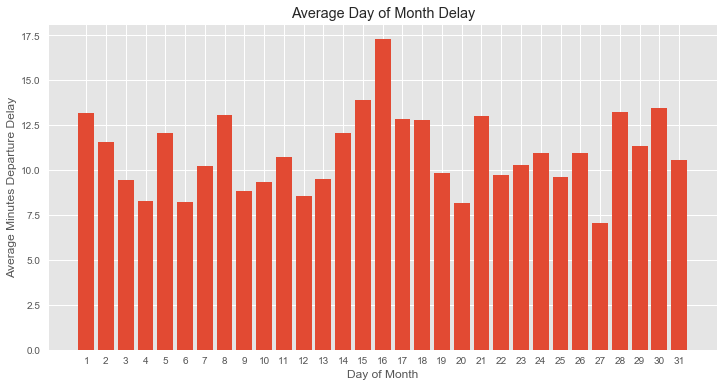

In [88]:
plt.figure(figsize=(12,6))
plt.bar(np.arange(1,32), days_del,  align='center')
plt.xticks(np.arange(1,32), np.arange(1,32))
plt.title('Average Day of Month Delay')
plt.xlabel('Day of Month')
plt.ylabel('Average Minutes Departure Delay')

In [84]:
week_del = data.groupby('DAY_OF_WEEK')['DEP_DELAY'].mean()

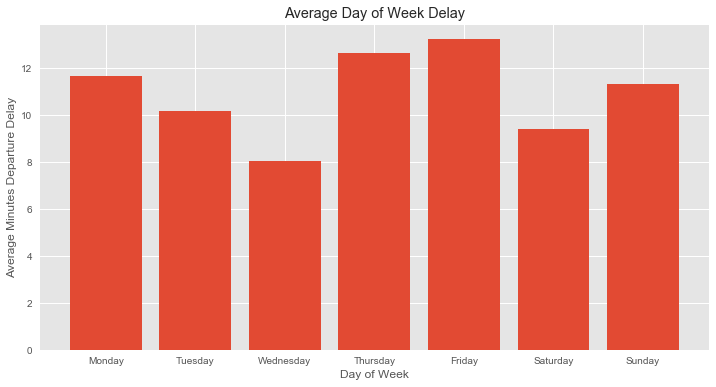

In [92]:
plt.figure(figsize=(12,6))
plt.bar(np.arange(1,8), week_del,  align='center')
plt.xticks(np.arange(1,8), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Average Day of Week Delay')
plt.xlabel('Day of Week')
plt.ylabel('Average Minutes Departure Delay')

In [89]:
months_del = data.groupby('MONTH')['DEP_DELAY'].mean()

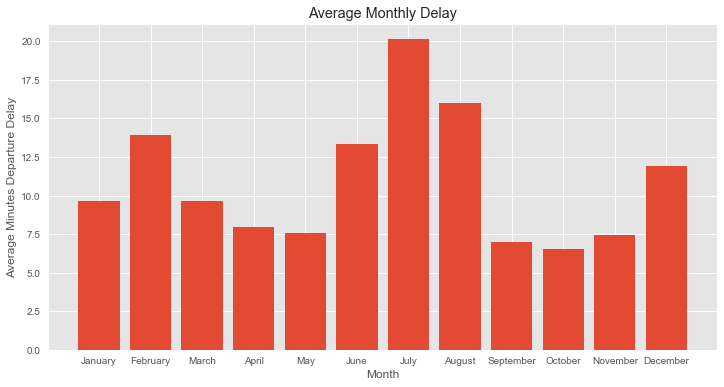

In [91]:
plt.figure(figsize=(12,6))
plt.bar(np.arange(1,13), months_del,  align='center')
plt.xticks(np.arange(1,13), ['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.title('Average Monthly Delay')
plt.xlabel('Month')
plt.ylabel('Average Minutes Departure Delay')

In [96]:
month_del = data.groupby('MONTH')['DEP_DELAY'].count()

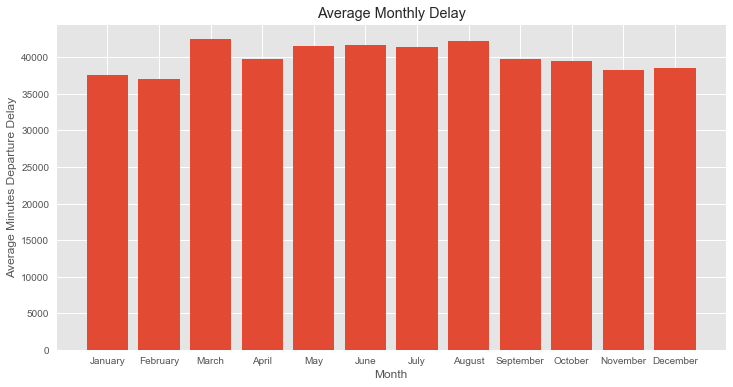

In [97]:
plt.figure(figsize=(12,6))
plt.bar(np.arange(1,13), month_del,  align='center')
plt.xticks(np.arange(1,13), ['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.title('Average Monthly Delay')
plt.xlabel('Month')
plt.ylabel('Average Minutes Departure Delay')

In [98]:
time = data.groupby('DEP_TIME_BLK')['DEP_DELAY'].mean()

In [105]:
keys = list(time.keys())

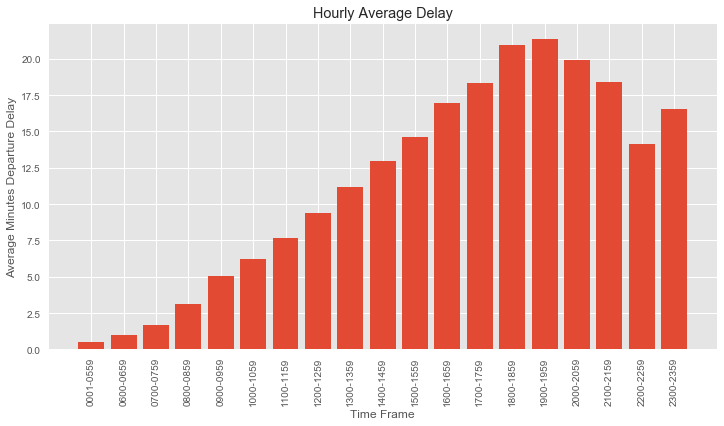

In [108]:
plt.figure(figsize=(12,6))
plt.bar(np.arange(1,20), time,  align='center')
plt.xticks(np.arange(1,20), keys, rotation='vertical')
plt.title('Hourly Average Delay')
plt.xlabel('Time Frame')
plt.ylabel('Average Minutes Departure Delay')